In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import matplotlib.lines as mlines

In [ ]:
# Use the modern scoring system

modern = True

In [ ]:
# Import the final standings

dataframes = []
for year in range(1956,2024):
    if year == 2019:
        continue
    if modern:
        df = pd.read_csv("../processed data/" + str(year) + "/eindstand_modern" + str(year) + ".csv")
    else: 
        df = pd.read_csv("../processed data/" + str(year) + "/eindstand" + str(year) + ".csv")
    df["Jaar"] = year
    dataframes.append(df)

eindstand = pd.concat(dataframes, axis=0, ignore_index=True)

In [54]:
# Assure datatypes
eindstand = eindstand.astype({
    "Club": "string",  # Text
    "Jaar": "int",     # Year as integer
    "Gs": "int",       # Integer
    "W": "int",        # Integer
    "G": "int",        # Integer
    "V": "int",        # Integer
    "Pnt": "int",      # Integer
    "Dv": "int",       # Integer
    "Dt": "int",       # Integer
    "Ds": "int"        # Integer
})

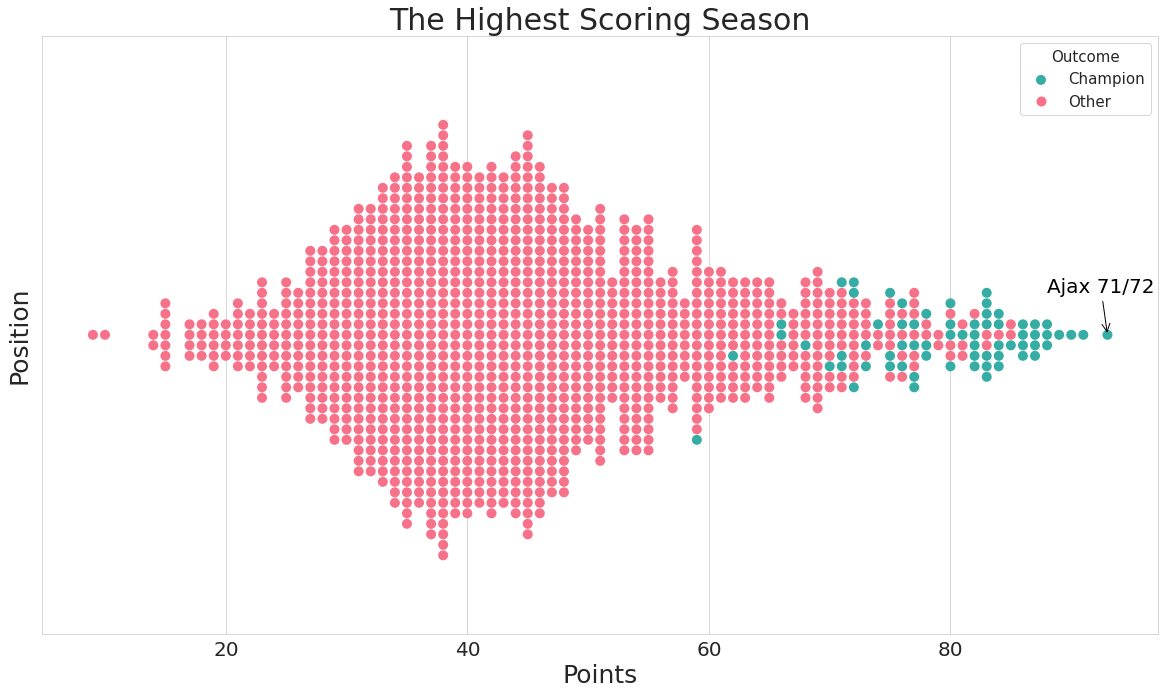

In [55]:
plt.figure(figsize=(20, 11))

# Create Swarmplot
sns.swarmplot(
    data=eindstand,
    x="Pnt",
    hue=(eindstand["Pos"] <= 1),
    palette=sns.color_palette("husl", 2),
    size=10,
    linewidth=0,
    orient="h",
    native_scale=True
)

# Update the legend with larger font
plt.legend(
    title="Outcome",
    labels=["Champion", "Other"],
    loc="best",
    title_fontsize=15,
    fontsize=15 
)

# Add annotations with arrows
plt.annotate(
    "Ajax 71/72",  
    xy=(93, 0),  
    xytext=(88, -0.07),  
    arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle="->"),
    fontsize=20,
    color="black"
)

# Adjust plot title and labels with larger font
plt.title("The Highest Scoring Season", fontsize=30)
plt.xlabel("Points", fontsize=25)  
plt.ylabel("Position", fontsize=25) 

# Adjust tick labels with larger font
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 

# Show the plot
plt.show()



In [ ]:
# Import the match data

dataframes = []
for year in range(1956,2024):
    if year == 2019:
        continue
    df = pd.read_csv("../processed data/" + str(year) + "/uitslagen" + str(year) + ".csv")
    df["Jaar"] = year
    dataframes.append(df)


matches = pd.concat(dataframes, axis=0, ignore_index=True)

In [ ]:
# Create a dataframe for the progression through the season
progression = pd.DataFrame([], columns=["Club", "Jaar", "Gs", "W", "G", "V", "Pnt", "Dv", "Dt", "Ds"])


for year in range(1956,2024):
    if year == 2019:
        continue

    teams = list(matches[(matches["Jaar"] == year)]["Thuis"].unique())
    for team in teams:
        rows = []

        team_matches = matches[(matches["Jaar"] == year) & ((matches["Thuis"] == team) | (matches["Uit"] == team))]
        w, g, v, p, dv, dt, ds = 0, 0, 0, 0, 0, 0, 0

        rows.append([team, year, 0, w, g, v, p , dv, dt, ds])
        # Get the result for all matches of the team
        for i in range(len(team_matches)):
            if team_matches.iloc[i]["Thuis"] == team:
                w += 1 if team_matches.iloc[i]["Uitslag"] == "Gewonnen" else 0
                g += 1 if team_matches.iloc[i]["Uitslag"] == "Gelijk" else 0
                v += 1 if team_matches.iloc[i]["Uitslag"] == "Verloren" else 0
                p = 3 * w + g
                dv += team_matches.iloc[i]["Thuis Doelpunten"]
                dt += team_matches.iloc[i]["Uit Doelpunten"]
                ds = dv - dt
            else:
                w += 1 if team_matches.iloc[i]["Uitslag"] == "Verloren" else 0
                g += 1 if team_matches.iloc[i]["Uitslag"] == "Gelijk" else 0
                v += 1 if team_matches.iloc[i]["Uitslag"] == "Gewonnen" else 0
                p = 3 * w + g
                dv += team_matches.iloc[i]["Uit Doelpunten"]
                dt += team_matches.iloc[i]["Thuis Doelpunten"]
                ds = dv - dt
            
            rows.append([team, year, i + 1, w, g, v, p, dv, dt, ds])

        progression = pd.concat([progression, pd.DataFrame(rows, columns=["Club", "Jaar", "Gs", "W", "G", "V", "Pnt", "Dv", "Dt", "Ds"])])


In [58]:
unbeaten_streaks = []

# Get all unbeaten streaks
for year in range(1956, 2024):
    if year == 2019:
        continue

    teams = list(matches[(matches["Jaar"] == year)]["Thuis"].unique())

    for team in teams:
        team_matches = progression[(progression["Jaar"] == year) & (progression["Club"] == team)]

        # How long was the team unbeaten
        unbeaten = 0
        for i in range(1, len(team_matches)):
            if team_matches.iloc[i]["V"] == 0:
                unbeaten += 1
            else:
                break
        
        unbeaten_streaks.append([team, year, unbeaten])


# Create dataframe
unbeaten_streaks = pd.DataFrame(unbeaten_streaks, columns=["Club", "Jaar", "Unbeaten Streak"])

# Assure datatypes
unbeaten_streaks = unbeaten_streaks.astype({
    "Club": "string",  # Text
    "Jaar": "int",     # Year as integer
    "Unbeaten Streak": "int",       # Integer
})

In [59]:
# Get colors
colors = sns.color_palette("husl", 2)

# Number of games to display
games = [0, 5, 10, 20, 30, 34]

# Get colors in right format
custom_colors = [f"rgb({int(colors[0][0] * 255)}, {int(colors[0][1] * 255)}, {int(colors[0][2] * 255)})"] * (len(games) - 1) + \
                [f"rgb({int(colors[1][0] * 255)}, {int(colors[1][1] * 255)}, {int(colors[1][2] * 255)})"]

# Make the dataframe
unbeaten = [len(unbeaten_streaks[unbeaten_streaks["Unbeaten Streak"] >= game]) for game in games]
games_str = [str(game) for game in games]
df = pd.DataFrame([[games_str[i], unbeaten[i]] for i in range(len(games_str))], columns=["Games unbeaten", "Number of teams"])

# Create the funnel
fig = go.Figure(go.Funnel(
    x = df["Games unbeaten"],
    y = df["Number of teams"],
    opacity = 0.8, 
    marker = {"color": custom_colors},
    connector={"fillcolor": "pink"},
    textinfo="value",
    textfont={"color": "black", "size": 40},
    orientation="v",
    width=0.75
    )
    )

# Layout
fig.update_layout(
    paper_bgcolor="white", 
    plot_bgcolor="white",
    title=dict(
        text="The Undefeated Season", 
        font=dict(size=35) 
    ),
    xaxis=dict(
        title=dict(
            text="Number of games undefeated", 
            font=dict(size=25) 
        ),
        tickfont=dict(
            size=18 
        )
    )
)

fig.show()

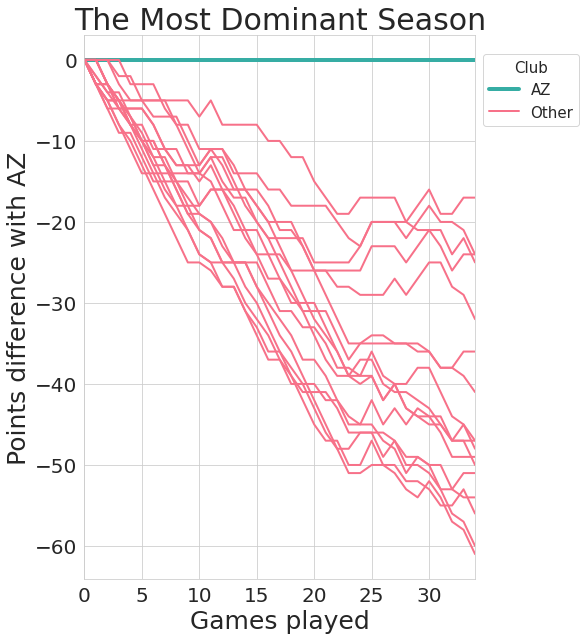

In [60]:
plt.figure(figsize=(7, 10))

custom_order = ['AZ',
 'Ajax',
 'FC Utrecht',
 'Feyenoord',
 'PSV',
 'FC Twente',
 'Sparta Rotterdam',
 'MVV Maastricht',
 'PEC Zwolle',
 'Willem II',
 'ADO Den Haag',
 'Go Ahead Eagles',
 'Roda JC Kerkrade',
 'NAC Breda',
 'FC Groningen',
 'N.E.C.',
 'FC Wageningen',
 'Excelsior Rotterdam']
# Ensure that the 'Club' column in 'progression' follows this custom order
progression['Club'] = pd.Categorical(progression['Club'], categories=custom_order, ordered=True)


point_dif = pd.DataFrame([], columns=["Gs", "Club", "PntsBh"])

year = 1980

for gs in range(35):
    prog = progression[(progression["Jaar"] == year) & (progression["Gs"] == gs)].sort_values("Club")
    for team in prog["Club"]:
        new_row = [gs, team, prog[prog["Club"] == team]["Pnt"].iloc[0] - prog["Pnt"].iloc[0]]
        point_dif.loc[len(point_dif)] = new_row

sns.set_style("whitegrid")

# Create a custom palette
az_color = sns.color_palette("husl", 2)[1]
other_color = sns.color_palette("husl", 2)[0] 

# Map the palette
palette = {club: az_color if club == "AZ" else other_color for club in point_dif["Club"]}

for club, color in palette.items():
    data = point_dif[point_dif["Club"] == club]
    line_width = 4 if club == "AZ" else 2  # Thicker line for AZ
    sns.lineplot(data=data, x="Gs", y="PntsBh", hue=None, color=color, linewidth=line_width)


# Create custom legend handles
az_handle = mlines.Line2D([], [], color=az_color, linestyle='-', linewidth=4, label='AZ')
other_handle = mlines.Line2D([], [], color=other_color, linestyle='-', linewidth=2, label='Other')

# ACustom legend
plt.legend(
    handles=[az_handle, other_handle],
    title="Club",
    loc="center left",
    bbox_to_anchor=(1, 0.9),
    title_fontsize=15,
    fontsize=15 
)

# Remove the tick and gridline at 35
current_ticks = plt.gca().get_xticks()  
plt.xticks([tick for tick in current_ticks if tick != 35])
plt.xlim(left=0, right=34)


# Adjust plot title and labels with larger font
plt.title("The Most Dominant Season", fontsize=30)  
plt.xlabel("Games played", fontsize=25)  
plt.ylabel("Points difference with AZ", fontsize=25)  

# Adjust tick labels with larger font
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 

plt.show()